### For which tickers are Robinhood users and WSB mentions correlated??? 
1. Prominent sectors?
2. Compared to top 20 tickers from Robinhood / WSB? 

Data were prepared in robintrack analysis.ipynb to be in sync (time-series). Smooth_ticker_df was prepared by taking a 3-day moving average on the ticker_df.

In [19]:
# load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats
from timeit import default_timer as timer

cwd = os.getcwd()
dir_ = cwd + '/data/'

# data cleaned + manipulated in robintrack analysis.ipynb
ticker_df_in_range = pd.read_csv(dir_+ 'ticker_df_in_range.csv', parse_dates = [1])
smooth_ticker_df_in_range = pd.read_csv(dir_+ 'smooth_ticker_df_in_range.csv', parse_dates = [1])
final_user_df_in_range = pd.read_csv(dir_ + 'final_user_df_in_range.csv', parse_dates = [1])

In [20]:
final_user_df_in_range

,Unnamed: 0,RIV,CSCO,PRI,SLIM,NZF,HLNE,UNT,HUBS,GPL,...,SPXX,OLLI,PPL,GSM,OBCI,ROKU,ARDC,MTDR,BWEN,KEM
0,2018-05-02 00:00:00-04:00,65.0,23646.000000,222.000000,69.000000,86.000000,126.000000,53.0,1224.000000,1828.000000,...,160.000000,432.000000,1049.000000,105.0,104.000000,12965.000000,2.0,85.000000,456.000000,2593.000000
1,2018-05-02 01:00:00-04:00,65.0,23646.000000,222.000000,69.000000,86.000000,126.000000,53.0,1224.000000,1828.000000,...,160.000000,432.000000,1049.000000,105.0,104.000000,12965.000000,2.0,85.000000,456.000000,2593.000000
2,2018-05-02 02:00:00-04:00,65.0,23652.611111,222.277778,68.944444,86.055556,126.166667,53.0,1223.888889,1827.833333,...,159.944444,431.555556,1049.388889,105.0,104.055556,12959.777778,2.0,85.277778,456.055556,2595.166667
3,2018-05-02 03:00:00-04:00,65.0,23659.222222,222.555556,68.888889,86.111111,126.333333,53.0,1223.777778,1827.666667,...,159.888889,431.111111,1049.777778,105.0,104.111111,12954.555556,2.0,85.555556,456.111111,2597.333333
4,2018-05-02 04:00:00-04:00,65.0,23665.833333,222.833333,68.833333,86.166667,126.500000,53.0,1223.666667,1827.500000,...,159.833333,430.666667,1050.166667,105.0,104.166667,12949.333333,2.0,85.833333,456.166667,2599.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19841,2020-08-05 17:00:00-04:00,385.0,60520.000000,1100.000000,111.000000,248.000000,120.000000,10548.0,4287.000000,7355.000000,...,292.000000,2558.000000,7128.000000,3461.0,832.000000,50883.000000,163.0,12054.000000,1071.000000,1285.000000
19842,2020-08-05 18:00:00-04:00,385.0,60520.000000,1100.000000,111.000000,248.000000,120.000000,10548.0,4287.000000,7355.000000,...,292.000000,2558.000000,7128.000000,3461.0,832.000000,50883.000000,163.0,12054.000000,1071.000000,1285.000000
19843,2020-08-05 19:00:00-04:00,385.0,60520.000000,1100.000000,111.000000,248.000000,120.000000,10548.0,4287.000000,7355.000000,...,292.000000,2558.000000,7128.000000,3461.0,832.000000,50883.000000,163.0,12054.000000,1071.000000,1285.000000
19844,2020-08-05 20:00:00-04:00,385.0,60520.000000,1100.000000,111.000000,248.000000,120.000000,10548.0,4287.000000,7355.000000,...,292.000000,2558.000000,7128.000000,3461.0,832.000000,50883.000000,163.0,12054.000000,1071.000000,1285.000000


In [9]:
# initialize time index (localize, convert timezone)
# per = len(ticker_df_in_range.index)
# time_index = pd.date_range('05/02/2018 04:00:00', periods = per, freq = 'H')
def initialize_df(df):
    df.index = df.iloc[:, 0].tz_localize('UTC').tz_convert('US/Eastern')

In [10]:
dfs = [ticker_df_in_range, smooth_ticker_df_in_range, final_user_df_in_range]
for df in dfs:
    initialize_df(df)

AttributeError: 'RangeIndex' object has no attribute 'tz_localize'

In [ ]:
# check dimensions
ticker_df_in_range.shape

In [ ]:
smooth_ticker_df_in_range.shape

In [ ]:
final_user_df_in_range.shape

### Calculating Spearman's Correlation between RH and WSB

In [27]:
# Calculate Spearman's Ranked Correlation
def calculate_spearman_cor(ticker_df, user_df): 
    spearman_cor = {}
    s = timer()
    for ticker in ticker_df.columns.values:
        try: 
            cor = stats.spearmanr(ticker_df[ticker].values, user_df[ticker].values)
            spearman_cor[ticker] = cor[0]
        except:
            pass
    e = timer() - s
    print(e)
    series = pd.Series(spearman_cor)
    return series

In [ ]:
for i in [0,1]:
    print(i)

In [ ]:
cor_df = pd.DataFrame()
ticker_dfs = [ticker_df_in_range, smooth_ticker_df_in_range]
for i in [0,1]:
    cor_df[i] = calculate_spearman_cor(ticker_dfs[i], final_user_df_in_range)

/Users/leeyujin/Environments/research/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/leeyujin/Environments/research/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/leeyujin/Environments/research/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/leeyujin/Environments/research/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/leeyujin/Environments/research/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.tslibs.timezones.tz_compare'
Traceback (most recent call last):
  File "/Users/leeyujin/Environments/research/lib/python3.7/site-packages/dateutil/tz/tz.py", line 182, in __eq__
    def __eq__(self, other):
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.tslibs.timezones.tz_compare'
Traceback (most recent call last):
  File "/Users/leeyujin/Environments/research/lib/python3.7/site-packages/dateutil/tz/tz.py", line 183, in __eq__
    if not isinstance(other, tzoffset):
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.tslibs.timezones.tz_compare'
Traceback (most recent call last):
  File "/Users/leeyujin/Environments/research/lib/python3.7/site-packages/dateutil/tz/tz.py", line 182, in __eq__
    def __eq__(self, other):
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.tslibs.timezones.tz_compare'
Traceback (most recent call last):
  File "/Users/leeyujin/Environments/research/lib/python3.7/site-packages/dateutil/tz/tz.py", line 182, in __eq__
    def __eq__(self, other):
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.tslibs.timezones.tz_compare'
Traceback (most recent call last):
  File "/Users/leeyujin/Environments/research/lib/python3.7/site-packages/dateutil/tz/tz.py", line 182, in __eq__
    def __eq__(self, other):
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.tslibs.timezones.tz_compare'
Traceback (most recent call last):
  File "/Users/leeyujin/Environments/research/lib/python3.7/site-packages/dateutil/tz/tz.py", line 182, in __eq__
    def __eq__(self, other):
KeyboardInterrupt: 


KeyboardInterrupt: 

Exception ignored in: 'pandas._libs.tslibs.timezones.tz_compare'
Traceback (most recent call last):
  File "/Users/leeyujin/Environments/research/lib/python3.7/site-packages/dateutil/tz/tz.py", line 182, in __eq__
    def __eq__(self, other):
KeyboardInterrupt: 


In [ ]:
def calculate_ccf(ticker_df, user_df):
    ccf = {}
    s = timer()
    for ticker in ticker_df.columns.values:
        try: 
            cor = np.corrcoef(ticker_df[ticker].values, user_df[ticker].values)[0, 1]
        except:
            pass
    e = timer() - s
    print('time elapsed: ', e)
    series = pd.Series(ccf)
    return ccf

Now we will explore the correlation data.

In [ ]:
plt.figure(figsize = (12, 5))
sns.distplot(ticker_cor[0].dropna(), kde= False)
plt.title("Spearman Correlation: Robinhood user count v. Wallstreetbets ticker mention per hour")

In [ ]:
top_20_correlated = ticker_cor.sort_values(by = [0], ascending = False)[:20].T

### Put in  sector data

In [18]:
# load company industry data
nasdaq = pd.read_csv(dir_ +'nasdaq.csv')
nyse = pd.read_csv(dir_ + 'nyse.csv')

# initialize stock_sector data
nasdaq.set_index('Symbol', inplace = True)
nyse.set_index('Symbol', inplace = True)

nasdaq_ticker = nasdaq.index.values
nyse_ticker = nyse.index.values

In [ ]:
def get_sector_industry(ticker_list):
    sector = {}
    industry = {}
    for ticker in ticker_list:
        if ticker in nasdaq_ticker:
            sector[ticker] = nasdaq.loc[ticker]['Sector']
            industry[ticker] = nasdaq.loc[ticker]['industry']
        elif ticker in nyse_ticker:
            sector[ticker] = nyse.loc[ticker]['Sector']
            industry[ticker] = nyse.loc[ticker]['industry']
        else:
            if ticker == 'IWM':
                sector.append('ETF')
                industry.append('ETF')
            else:
                sector.append('ETF')
                industry.append('Precious Metals')
        return pd.Series(sector), pd.Series(industry)


In [182]:
tickers_of_interest = pd.DataFrame(columns = ['ticker', 'source', 'rank', 'sector', 'industry'])

In [185]:
tickers_of_interest['ticker'] = top_20_correlated.columns.values
tickers_of_interest['source'] = ['top_cor'] * 20
tickers_of_interest['rank'] = np.arange(1,21)
tickers_of_interest['sector'] = sector
tickers_of_interest['industry'] = industry

In [186]:
tickers_of_interest

,ticker,source,rank,sector,industry
0,BA,top_cor,1,Capital Goods,Aerospace
1,CCL,top_cor,2,Consumer Services,Marine Transportation
2,AAL,top_cor,3,Transportation,Air Freight/Delivery Services
3,DIS,top_cor,4,Consumer Services,Services-Misc. Amusement & Recreation
4,MU,top_cor,5,Technology,Semiconductors
5,MGM,top_cor,6,Consumer Services,Hotels/Resorts
6,TSLA,top_cor,7,Capital Goods,Auto Manufacturing
7,DAL,top_cor,8,Transportation,Air Freight/Delivery Services
8,J,top_cor,9,Basic Industries,Military/Government/Technical
9,MSFT,top_cor,10,Technology,Computer Software: Prepackaged Software


In [173]:
top_20_correlated.columns.values

array(['BA', 'CCL', 'AAL', 'DIS', 'MU', 'MGM', 'TSLA', 'DAL', 'J', 'MSFT',
       'HTZ', 'F', 'IWM', 'XOM', 'GLD', 'ARE', 'SLV', 'SHOP', 'W', 'TD'],
      dtype=object)

missing tickers: IWM, GLD, SLV
IWM: iShares Russell 2000 
GLD: gold
SLV: silver
all in NYSEArc

Text(0.5, 1.0, 'Sector of Top 20 Correlated Tickers')

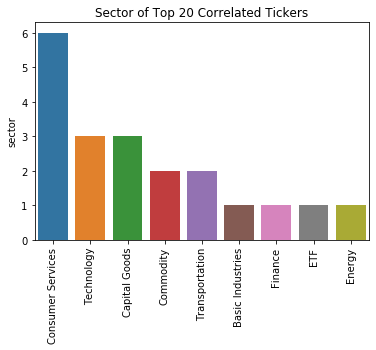

In [199]:
# plot the sector / industry of top correlated tickers
sector_count = tickers_of_interest['sector'].value_counts()
sns.barplot(x = sector_count.index.values, y = sector_count)
plt.xticks(rotation = 90)
plt.title("Sector of Top 20 Correlated Tickers")

In [194]:
tickers_of_interest['industry'].value_counts()

Auto Manufacturing                         2
Air Freight/Delivery Services              2
Commodity                                  2
Computer Software: Prepackaged Software    2
Catalog/Specialty Distribution             1
Commercial Banks                           1
Real Estate Investment Trusts              1
Aerospace                                  1
Rental/Leasing Companies                   1
Integrated oil Companies                   1
Marine Transportation                      1
Military/Government/Technical              1
ETF                                        1
Semiconductors                             1
Hotels/Resorts                             1
Services-Misc. Amusement & Recreation      1
Name: industry, dtype: int64

In [23]:
top_20 = pd.read_csv(cwd + '/data/top_20_correlated_tickers.csv')

In [51]:
common_name_tickers = ['BIG', 'BRO', 'HAS', 'ARE', 'ON', 'NGL', 'OR', 'SO', 'TECH']

In [52]:
mask = (top_20['ticker'].isin(common_name_tickers))
top_20_common_dropped = top_20.loc[~mask,:]

In [54]:
top_20_common_dropped.sort_values(by = ['sector'], inplace = True)

/Users/leeyujin/Environments/research/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
top_20_common_dropped.head()

,Unnamed: 0,cor,industry,rank,sector,source,ticker,which_cor
0,0,0.817895,Treasury Bond,1,ETF,smooth_cor,TLT,Spearman
1,1,0.542044,Aerospace,1,Capital Goods,top_cor,BA,Spearman
2,2,0.867138,Electric Utilities: Central,1,Public Utilities,smooth_cor,FE,CCF
3,3,0.480544,Marine Transportation,2,Consumer Services,top_cor,CCL,Spearman
4,4,0.840766,Industrial Machinery/Components,2,Miscellaneous,smooth_cor,KODK,CCF


In [57]:
spearman_cor = top_20_common_dropped[top_20_common_dropped.which_cor == 'Spearman']

In [69]:
spearman_cor.sort_values(by = ['source', 'rank'])

,Unnamed: 0,cor,industry,rank,sector,source,ticker,which_cor
0,0,0.817895,Treasury Bond,1,ETF,smooth_cor,TLT,Spearman
5,5,0.815847,Precious Metals,2,Basic Industries,smooth_cor,GOLD,Spearman
6,6,0.815517,Precious Metals,3,ETF,smooth_cor,SLV,Spearman
9,9,0.806923,Electric Utilities: Central,4,Public Utilities,smooth_cor,ES,Spearman
13,13,0.798654,Precious Metals,5,ETF,smooth_cor,GLD,Spearman
16,16,0.790860,Military/Government/Technical,6,Basic Industries,smooth_cor,J,Spearman
24,24,0.782186,Aerospace,9,Capital Goods,smooth_cor,BA,Spearman
29,29,0.759799,Services-Misc. Amusement & Recreation,10,Consumer Services,smooth_cor,DIS,Spearman
30,30,0.757735,Commercial Banks,11,Finance,smooth_cor,TD,Spearman
33,33,0.755061,ETF,12,ETF,smooth_cor,IWM,Spearman


Text(0.5, 1.0, 'Sectors of tickers with high Spearman Correlation before v. after smoothing')

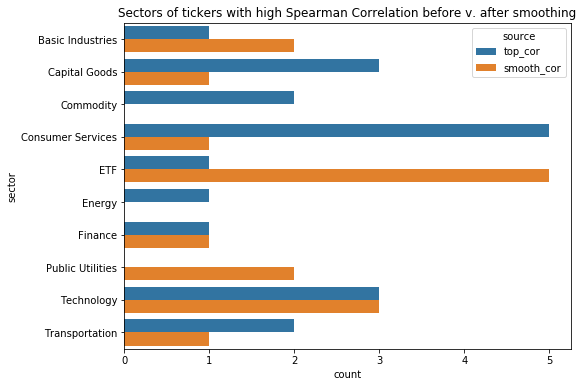

In [58]:
plt.figure(figsize = (8,6))
sns.countplot(y = 'sector', hue = 'source', data = spearman_cor)
plt.title("Sectors of tickers with high Spearman Correlation before v. after smoothing")

In [55]:
smooth_cor_common_dropped = top_20_common_dropped[top_20_common_dropped.source == 'smooth_cor']

In [64]:
smooth_cor_common_dropped.sort_values(['sector','which_cor'], inplace = True)

/Users/leeyujin/Environments/research/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
smooth_cor_common_dropped.head()

,Unnamed: 0,cor,industry,rank,sector,source,ticker,which_cor
5,5,0.815847,Precious Metals,2,Basic Industries,smooth_cor,GOLD,Spearman
16,16,0.790860,Military/Government/Technical,6,Basic Industries,smooth_cor,J,Spearman
24,24,0.782186,Aerospace,9,Capital Goods,smooth_cor,BA,Spearman
12,12,0.804387,RETAIL: Building Materials,5,Consumer Services,smooth_cor,HBP,CCF
54,54,0.724387,Marine Transportation,19,Consumer Services,smooth_cor,NCLH,CCF


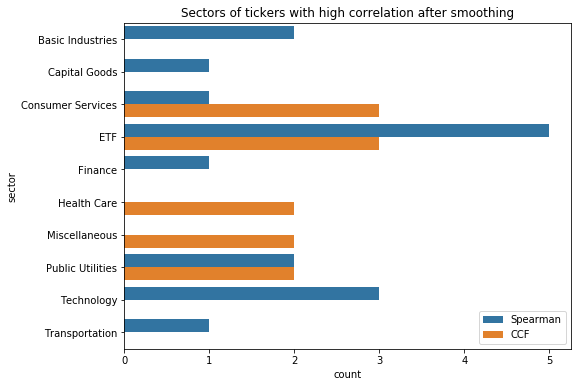

In [66]:
plt.figure(figsize = (8,6))
sns.countplot(y = 'sector', hue = 'which_cor',data = smooth_cor_common_dropped)
plt.title("Sectors of tickers with high correlation after smoothing")
plt.legend(loc = 4)